In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_73/1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Part 1

In [2]:
data = pd.read_csv('housingData.txt', delimiter=",")
print(data)
#20634 entries (households) of 9 properties

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      2.1827      26.0  4.521429   0.921429       305.0  2.178571     40.05   
1      3.0755      32.0  4.623068   0.983353      3868.0  4.599287     32.77   
2      1.8235      40.0  4.701149   1.126437       928.0  3.555556     37.75   
3      1.4625      37.0  4.247845   1.105603      1673.0  3.605603     33.99   
4      1.9063      13.0  3.453125   0.984375       286.0  4.468750     33.97   
...       ...       ...       ...        ...         ...       ...       ...   
20629  4.3487      29.0  5.930712   1.026217      1554.0  2.910112     38.65   
20630  5.6790      20.0  6.401274   1.070064       457.0  2.910828     38.56   
20631  1.9327      10.0  5.789474   1.078947       898.0  3.938596     38.57   
20632  3.7500      38.0  5.275229   0.981651       259.0  2.376147     38.72   
20633  2.8542      37.0  5.253731   0.970149       238.0  3.552239     38.84   

       Longitude  price_above_median  


In [3]:
print(data.dtypes)
# 8/9 variables are floats and one int

anyduplicates = data[data.duplicated()]
print(anyduplicates)
data = data.drop_duplicates()
#duplicates were present (anyduplicates) and treated in the original dataframe data

MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
price_above_median      int64
dtype: object
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, price_above_median]
Index: []


In [4]:
data.info() # two columns with only 385/386
print(data.isna().sum()) # seen more clearly here
missing_rows = data[data.isna().any(axis=1)]
print(missing_rows) #see specific observations entirely
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20634 non-null  float64
 1   HouseAge            20634 non-null  float64
 2   AveRooms            20634 non-null  float64
 3   AveBedrms           20634 non-null  float64
 4   Population          20634 non-null  float64
 5   AveOccup            20634 non-null  float64
 6   Latitude            20634 non-null  float64
 7   Longitude           20634 non-null  float64
 8   price_above_median  20634 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB
MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
price_above_median    0
dtype: int64
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Populatio

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
count,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000
mean,3.870795,28.640399,5.429171,1.096628,1425.398081,3.070449,35.631722,-119.569594,0.500000
std,1.899796,12.584629,2.474393,0.473929,1132.137403,10.387501,2.135738,2.003457,0.500012
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.000000
25%,2.563925,18.000000,4.440930,1.006067,787.000000,2.429649,33.930000,-121.800000,0.000000
50%,3.534950,29.000000,5.229190,1.048780,1166.000000,2.817937,34.260000,-118.490000,0.500000
75%,4.743550,37.000000,6.052381,1.099499,1725.000000,3.282249,37.710000,-118.010000,1.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,1.000000


In [5]:
print(data.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price_above_median'],
      dtype='object')


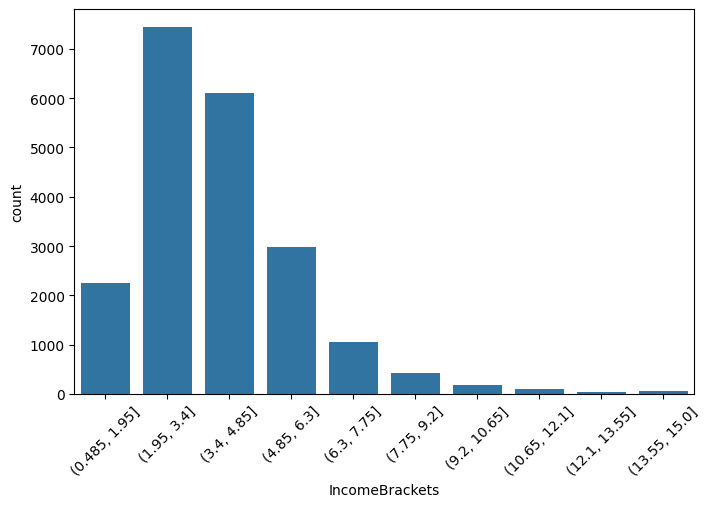

In [6]:
# Create bins
data['IncomeBrackets'] = pd.cut(data['MedInc'], bins=10)  # 5 bins of equal width

plt.figure(figsize=(8,5))
sns.countplot(x=data['IncomeBrackets'])
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()

#unimodal skewed right

#sns.countplot(data=data['MedInc'])

<Axes: xlabel='price_above_median', ylabel='Count'>

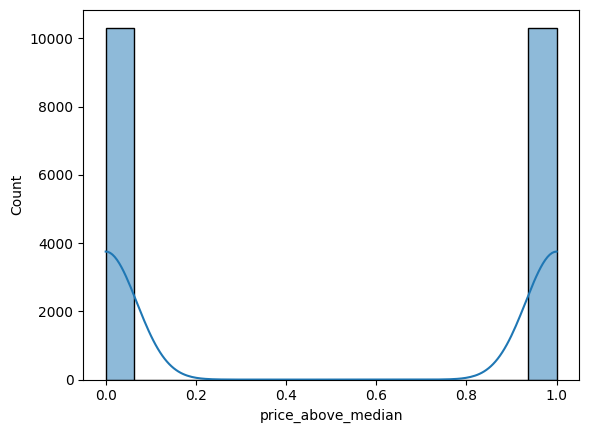

In [7]:
sns.histplot(data=data['price_above_median'], kde=True)

<Axes: xlabel='AveRooms'>

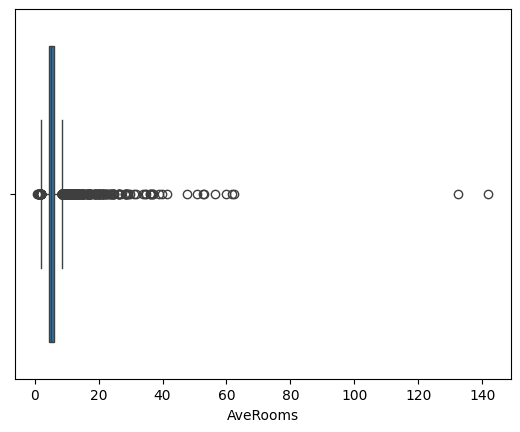

In [8]:
sns.boxplot(data=data, x='AveRooms')

In [9]:
#plt.figure(figsize=(25, 10))
#sns.heatmap(
  # data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
#plt.show()

Part 2

K-nearnest neighbor

Decision Tree Classifier

Random Forest Classifier

AdaBoost Classifier

In [10]:
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

#from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

#from sklearn.linear_model import SGDClassifier

In [11]:
#Data Split
print(data.columns)
data.columns = data.columns.astype(str)  # Convert column names to strings
X = data.drop(['IncomeBrackets', 'price_above_median'], axis=1)
y = data['price_above_median']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
print(X)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price_above_median', 'IncomeBrackets'],
      dtype='object')
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      2.1827      26.0  4.521429   0.921429       305.0  2.178571     40.05   
1      3.0755      32.0  4.623068   0.983353      3868.0  4.599287     32.77   
2      1.8235      40.0  4.701149   1.126437       928.0  3.555556     37.75   
3      1.4625      37.0  4.247845   1.105603      1673.0  3.605603     33.99   
4      1.9063      13.0  3.453125   0.984375       286.0  4.468750     33.97   
...       ...       ...       ...        ...         ...       ...       ...   
20629  4.3487      29.0  5.930712   1.026217      1554.0  2.910112     38.65   
20630  5.6790      20.0  6.401274   1.070064       457.0  2.910828     38.56   
20631  1.9327      10.0  5.789474   1.078947       898.0  3.938596     38.57   
20632  3.7500      38.0  

In [12]:
from sklearn.metrics import classification_report

#KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Checking the metrics on the test data
# accuracy_test=accuracy_score(y_test, y_pred)
# recall_test = recall_score(y_test, y_pred)
# precision_test = precision_score(y_test, y_pred)
# f1_test = f1_score(y_test, y_pred)
# print("Testing\nAccuracy: ", accuracy_test)
# print("Recall: ", recall_test)
# print("Precision: ", precision_test)
# print("F1: ", f1_test)

# # Checking metrics on the training data
# accuracy_train=accuracy_score(y_train, knn.predict(X_train))
# recall_train = recall_score(y_train, knn.predict(X_train))
# precision_train = precision_score(y_train, knn.predict(X_train))
# f1_train = f1_score(y_train, knn.predict(X_train))
# print("Training\nAccuracy: ", accuracy_train)
# print("Recall: ", recall_train)
# print("Precision: ", precision_train)
# print("F1: ", f1_train)

print(f"Performance on TEST\n*******************\n{classification_report(y_test, knn.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, knn.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.56      0.81      0.66      3095
           1       0.66      0.37      0.47      3096

    accuracy                           0.59      6191
   macro avg       0.61      0.59      0.57      6191
weighted avg       0.61      0.59      0.57      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      7222
           1       1.00      0.62      0.77      7221

    accuracy                           0.81     14443
   macro avg       0.86      0.81      0.81     14443
weighted avg       0.86      0.81      0.81     14443



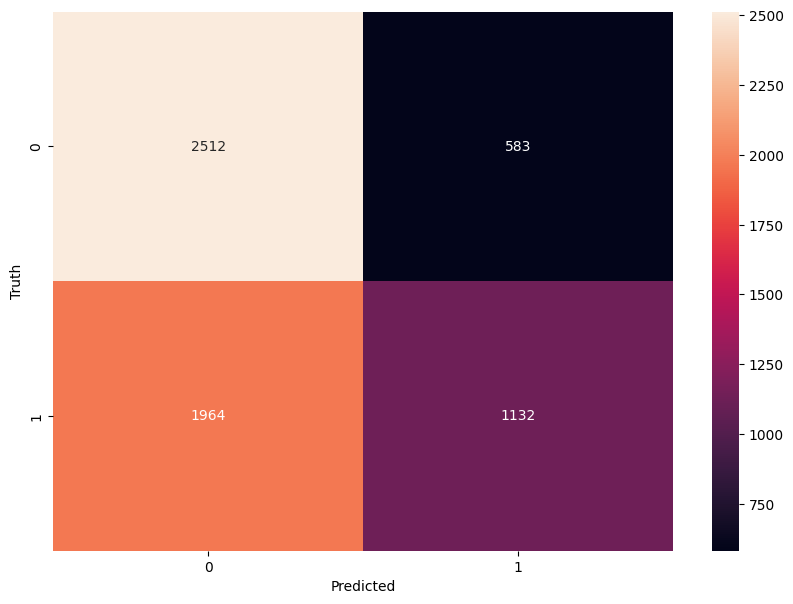

In [28]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn.predict(X_test))
#print(cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#biggest issue is false nulls as the model predicts 0 more than 1 for true 1s



In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [31]:
from sklearn.metrics import classification_report

#KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(f"Performance on TEST\n*******************\n{classification_report(y_test, knn.predict(X_test_scaled))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, knn.predict(X_train_scaled))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      3095
           1       0.88      0.68      0.77      3096

    accuracy                           0.79      6191
   macro avg       0.81      0.79      0.79      6191
weighted avg       0.81      0.79      0.79      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7222
           1       1.00      0.80      0.89      7221

    accuracy                           0.90     14443
   macro avg       0.92      0.90      0.90     14443
weighted avg       0.92      0.90      0.90     14443



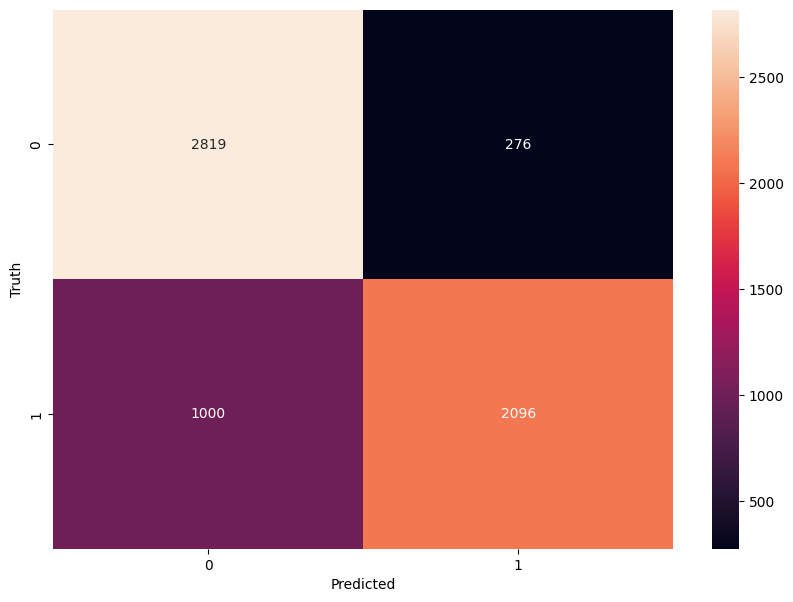

In [32]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn.predict(X_test_scaled))
#print(cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#large improvement primarily in the overwhelmingly problematic misclassification of true 1s



In [14]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)


print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3095
           1       0.83      0.84      0.84      3096

    accuracy                           0.83      6191
   macro avg       0.83      0.83      0.83      6191
weighted avg       0.83      0.83      0.83      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7222
           1       1.00      1.00      1.00      7221

    accuracy                           1.00     14443
   macro avg       1.00      1.00      1.00     14443
weighted avg       1.00      1.00      1.00     14443



In [15]:
#from sklearn import tree
#tree.plot_tree(model)

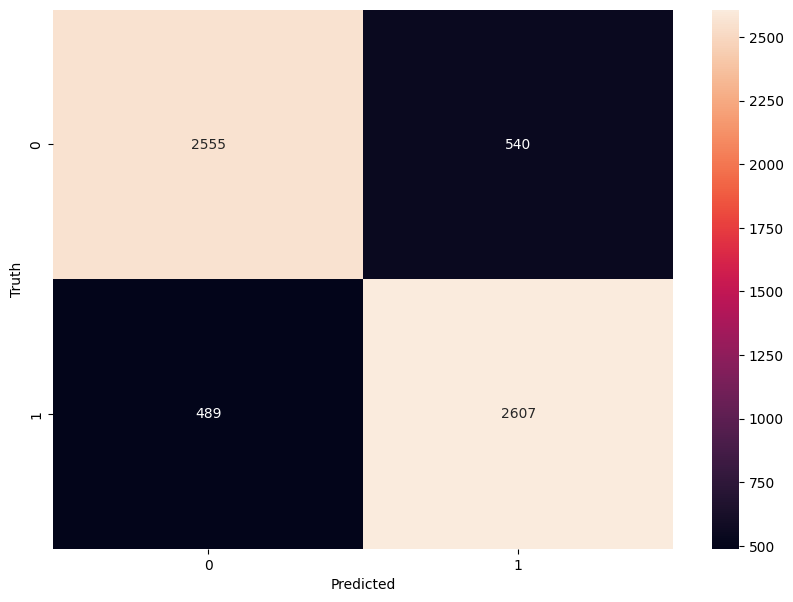

In [16]:
#Confusion Matrix

cm = confusion_matrix(y_test, model.predict(X_test))
#print(cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [17]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
param_grid = {
   "n_estimators": np.arange(start=10, stop=100, step=2),
   "max_depth": np.arange(start=2, stop=20),
   "min_samples_leaf": np.arange(start=1, stop=5),
   "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}],
}

gscv = GridSearchCV(model, param_grid, cv=5, n_jobs=8, scoring="recall", )
gscv.fit(X_train, y_train)
gscv.best_params_

{'class_weight': {0: 0.1, 1: 0.9},
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 10}

In [20]:
best_model = gscv.best_estimator_

In [21]:
from sklearn.metrics import classification_report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, best_model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, best_model.predict(X_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3095
           1       0.50      1.00      0.67      3096

    accuracy                           0.50      6191
   macro avg       0.25      0.50      0.33      6191
weighted avg       0.25      0.50      0.33      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      7222
           1       0.50      1.00      0.67      7221

    accuracy                           0.50     14443
   macro avg       0.75      0.50      0.33     14443
weighted avg       0.75      0.50      0.33     14443



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


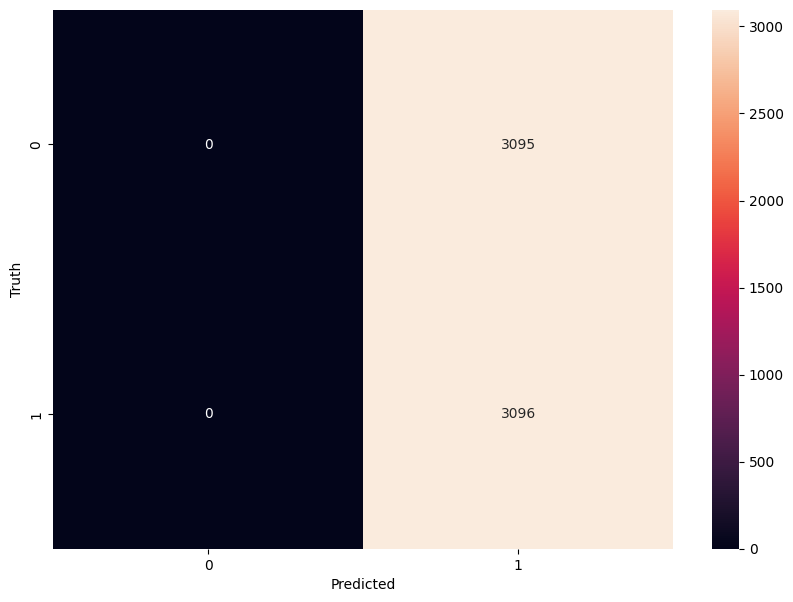

In [23]:
#Confusion Matrix

cm = confusion_matrix(y_test, best_model.predict(X_test))
#print(cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [33]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

# Adjusted hyperparameter grid
param_grid = {
    "n_estimators": np.arange(start=50, stop=150, step=10),  # Reduced range
    "max_depth": np.arange(start=5, stop=15, step=2),  # Focus depths
    "min_samples_leaf": np.arange(2, 6),  
    "class_weight": ["balanced", {0: 0.2, 1: 0.8}],  # Ibalanced option
}

gscv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring="f1") #better scoring metric

gscv.fit(X_train, y_train)

print(gscv.best_params_)

{'class_weight': 'balanced', 'max_depth': 13, 'min_samples_leaf': 4, 'n_estimators': 110}


In [34]:
best_model = gscv.best_estimator_

In [35]:
from sklearn.metrics import classification_report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, best_model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, best_model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3095
           1       0.88      0.89      0.89      3096

    accuracy                           0.89      6191
   macro avg       0.89      0.89      0.89      6191
weighted avg       0.89      0.89      0.89      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7222
           1       0.95      0.94      0.94      7221

    accuracy                           0.94     14443
   macro avg       0.94      0.94      0.94     14443
weighted avg       0.94      0.94      0.94     14443



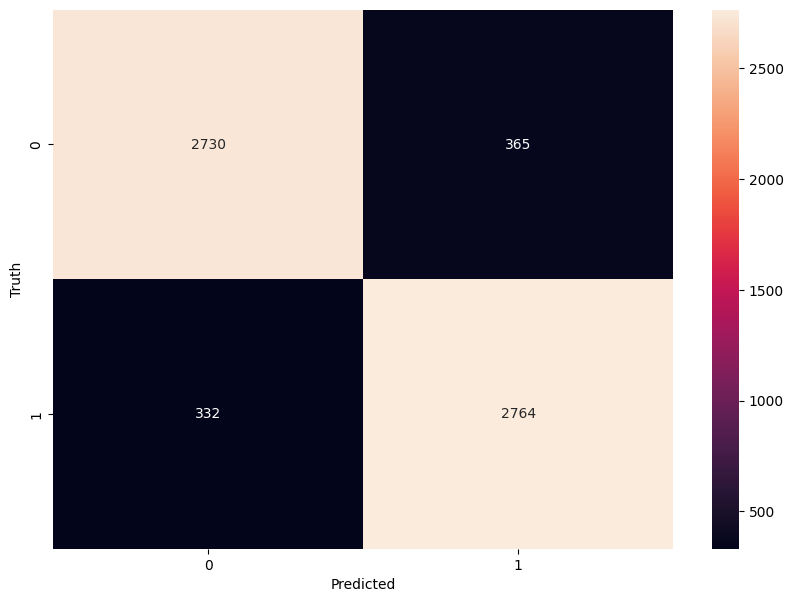

In [36]:
#Confusion Matrix

cm = confusion_matrix(y_test, best_model.predict(X_test))
#print(cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [24]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_stump = DecisionTreeClassifier(max_depth=1)

param_grid = {
   'learning_rate': [0.1, 0.5, 1.0],
   'n_estimators': [50, 100, 200]
}

abc = AdaBoostClassifier(estimator=decision_tree_stump, random_state=42)
grid_search = GridSearchCV(abc, param_grid, cv=3, n_jobs=8)
grid_search.fit(X_train, y_train)

test_report = classification_report(y_test, grid_search.predict(X_test))
train_report = classification_report(y_train, grid_search.predict(X_train))
print(f"Performance on TEST\n*******************\n{test_report}")
print(f"Performance on TRAIN\n********************\n{train_report}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3095
           1       0.87      0.88      0.88      3096

    accuracy                           0.88      6191
   macro avg       0.88      0.88      0.88      6191
weighted avg       0.88      0.88      0.88      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7222
           1       0.89      0.89      0.89      7221

    accuracy                           0.89     14443
   macro avg       0.89      0.89      0.89     14443
weighted avg       0.89      0.89      0.89     14443



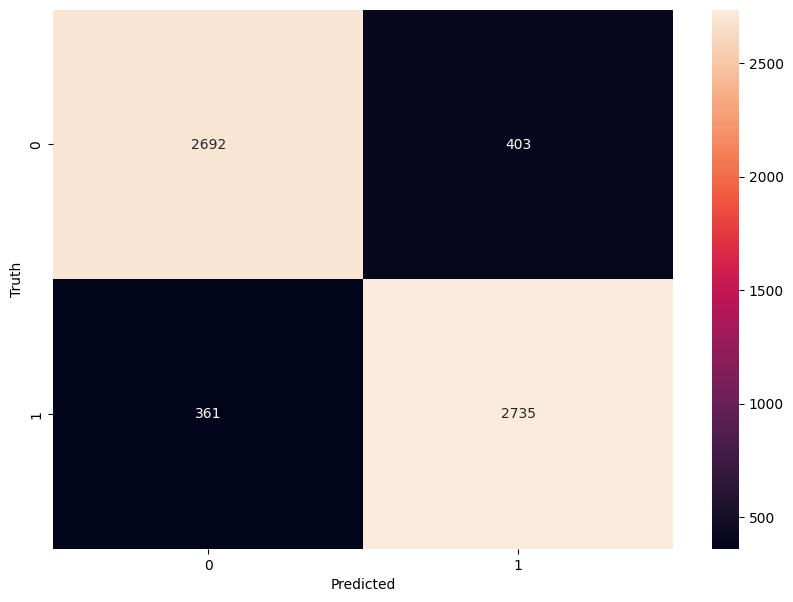

In [26]:
#Confusion Matrix

cm = confusion_matrix(y_test, grid_search.predict(X_test))
#print(cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#biggest issue misclassifies true ones more than it actually predicts them correctly